In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
user_eng = pd.read_csv('/Users/minga/SpringBoard-DS/relax_challenge/takehome_user_engagement.csv')

In [3]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])

In [5]:
"""
# bin login date into week and year seperately
user_eng['year'] = user_eng['time_stamp'].dt.year
user_eng['week'] = user_eng['time_stamp'].dt.isocalendar().week
"""

"\n# bin login date into week and year seperately\nuser_eng['year'] = user_eng['time_stamp'].dt.year\nuser_eng['week'] = user_eng['time_stamp'].dt.isocalendar().week\n"

In [6]:
"""
user_eng = user_eng.groupby(['year','week','user_id'])['visited'].count().reset_index(name='freq')
"""

"\nuser_eng = user_eng.groupby(['year','week','user_id'])['visited'].count().reset_index(name='freq')\n"

In [7]:
user_eng['week-year'] = user_eng['time_stamp'].dt.strftime('%U-%Y')
user_eng = user_eng.groupby(['week-year', 'user_id']).size().reset_index().rename(columns={0:'freq'})
user_eng.head()

,week-year,user_id,freq
0,00-2013,43,1
1,00-2013,69,2
2,00-2013,121,1
3,00-2013,168,1
4,00-2013,197,2


In [8]:
adopted_user = user_eng[user_eng['freq']>=3]

In [9]:
adopted_id = adopted_user.user_id.unique()
adopted_id.shape

(1432,)

In [10]:
users = pd.read_csv('/Users/minga/SpringBoard-DS/relax_challenge/takehome_users.csv', encoding='latin-1')

In [11]:
users.shape

(12000, 10)

### Most of the users joined via oragnization invite.

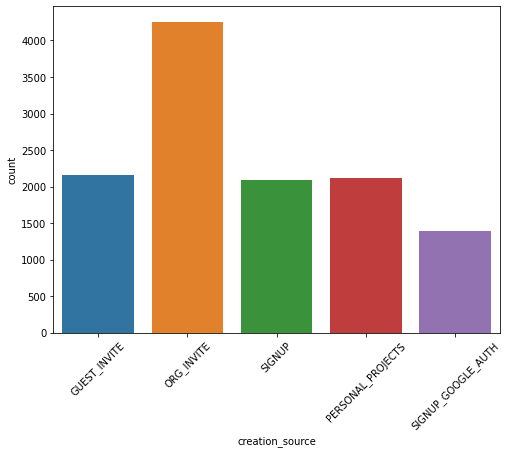

In [12]:
plt.figure(figsize = (8,6))
sns.countplot('creation_source', data=users)
plt.xticks(rotation=45)
plt.show();

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Convert creation_time and last_session_creation_time (unix  timestamp) to datetime format

In [14]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [15]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit = 's') 

In [16]:
def user_id_check(id):
    if id in adopted_id:
        return 1
    else:
        return 0

users['adopted']=users.object_id.apply(user_id_check)

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [18]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


### Thef adopted users are only 12% of total registered users.

In [19]:
user_adopted_ratio = round(users.adopted.sum()/users.shape[0], 2)
user_adopted_ratio

0.12

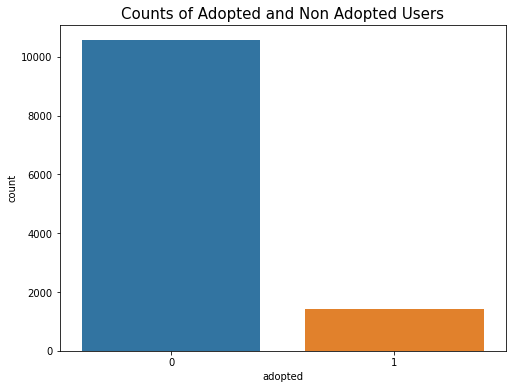

In [20]:
plt.figure(figsize = (8,6))
sns.countplot('adopted', data=users)
plt.title('Counts of Adopted and Non Adopted Users', fontsize=15)
plt.show();

### Two columns have missing values:
'last session creation time': it happens when the user did not log in at all after creating the account <br>
'invited by user id': there are four other methods to sign up the account besides invitation by anothe user
<br> Conclusion: Just leave the null value as is


In [21]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

### Feature Engineering

In [22]:
# extract month feature
users['creation_month'] = users['creation_time'].dt.month
users['last_month'] = users['last_session_creation_time'].dt.month

In [23]:
# extract day of month feature
users['creation_day'] = users['creation_time'].dt.day
users['last_day'] = users['last_session_creation_time'].dt.day

In [24]:
# extract hour feature
users['creation_hour'] = users['creation_time'].dt.hour
users['last_hour'] = users['last_session_creation_time'].dt.hour

In [25]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_month,last_month,creation_day,last_day,creation_hour,last_hour
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,4,4.0,22,22.0,3,3.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,11,3.0,15,31.0,3,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,3,3.0,19,19.0,23,23.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,5,5.0,21,22.0,8,8.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1.0,17,22.0,10,10.0


In [26]:
"""
# extract day name (Mon, Tue, Wed ...)
creation_to_one_hot = users['creation_time'].dt.day_name()
creation_days_name = pd.get_dummies(to_one_hot)

last_to_one_hot = users['last_session_creation_time'].dt.day_name()
last_days_name = pd.get_dummies(to_one_hot)
"""

"\n# extract day name (Mon, Tue, Wed ...)\ncreation_to_one_hot = users['creation_time'].dt.day_name()\ncreation_days_name = pd.get_dummies(to_one_hot)\n\nlast_to_one_hot = users['last_session_creation_time'].dt.day_name()\nlast_days_name = pd.get_dummies(to_one_hot)\n"

In [27]:
"""
# is_weekend flag 
creation_is_weekend = creation_to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
last_is_weekend = last_to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
"""

"\n# is_weekend flag \ncreation_is_weekend = creation_to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)\nlast_is_weekend = last_to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)\n"

In [28]:
"""
# Concat weekend check
features = pd.concat([creation_is_weekend, last_is_weekend] ,axis =1)
features.rename(columns = {'creation_time': 'creation_is_weekend', 
'last_session_creation_time':'last_is_weekend'}, inplace = True)

"""

"\n# Concat weekend check\nfeatures = pd.concat([creation_is_weekend, last_is_weekend] ,axis =1)\nfeatures.rename(columns = {'creation_time': 'creation_is_weekend', \n'last_session_creation_time':'last_is_weekend'}, inplace = True)\n\n"

In [29]:
X = users.drop(['object_id','adopted', 'name','email', 'creation_time', 'last_session_creation_time'], axis =1)
y = users[['adopted']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          6417 non-null   float64
 5   creation_month              12000 non-null  int64  
 6   last_month                  8823 non-null   float64
 7   creation_day                12000 non-null  int64  
 8   last_day                    8823 non-null   float64
 9   creation_hour               12000 non-null  int64  
 10  last_hour                   8823 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.0+ MB


In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", 
                                 unknown_value=-999).fit(X_train[['creation_source']])

In [33]:
X_train['creation_source'] = ordinal_encoder.transform(X_train[['creation_source']])

In [34]:
X_test['creation_source'] = ordinal_encoder.transform(X_test[['creation_source']])

In [35]:
X_train.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_month,last_month,creation_day,last_day,creation_hour,last_hour
9182,1.0,0,0,237,6917.0,6,NaN,12,NaN,13,NaN
11091,2.0,1,1,310,NaN,1,NaN,23,NaN,22,NaN
6428,2.0,0,0,193,NaN,12,NaN,30,NaN,18,NaN
288,2.0,1,1,185,NaN,1,1.0,14,16.0,5,5.0
2626,0.0,0,0,24,5221.0,5,5.0,22,26.0,11,11.0


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 9182 to 7270
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             9600 non-null   float64
 1   opted_in_to_mailing_list    9600 non-null   int64  
 2   enabled_for_marketing_drip  9600 non-null   int64  
 3   org_id                      9600 non-null   int64  
 4   invited_by_user_id          5120 non-null   float64
 5   creation_month              9600 non-null   int64  
 6   last_month                  7043 non-null   float64
 7   creation_day                9600 non-null   int64  
 8   last_day                    7043 non-null   float64
 9   creation_hour               9600 non-null   int64  
 10  last_hour                   7043 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 900.0 KB


In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

[22:43:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9625

In [38]:
feature_importances = xgb_cl.feature_importances_
feature_importances

array([0.02008412, 0.02302669, 0.02183672, 0.0241872 , 0.02481678,
       0.33971912, 0.32387462, 0.07480965, 0.09779458, 0.0278601 ,
       0.02199046], dtype=float32)

In [39]:
feature_importances = pd.DataFrame(zip(feature_importances, X_train.columns), 
                                   columns = ['feature_importance', 'attribute']).sort_values('feature_importance', 
                                                                                             ascending = False)
feature_importances

,feature_importance,attribute
5,0.339719,creation_month
6,0.323875,last_month
8,0.097795,last_day
7,0.074810,creation_day
9,0.027860,creation_hour
4,0.024817,invited_by_user_id
3,0.024187,org_id
1,0.023027,opted_in_to_mailing_list
10,0.021990,last_hour
2,0.021837,enabled_for_marketing_drip
